
<center>  
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300">
</center> 

<h1 align=center><font size = 5>Apply Basic Plot Learning</font></h1>

<hr>


## Table of Contents
<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="#ref0">Introduction</a></li>
<li><a href="#ref1">Scatter Plots</a></li>
<li><a href="#ref2">Line Plots</a></li>
<li style="margin-left: 40px;"><a href="#ref3">Simple Line Plots</a></li>
<li style="margin-left: 40px;"><a href="#ref4">Multiple Line Plots</a></li>
<li><a href="#ref5">Box Plots</a></li>
<br>
<p></p>
Estimated Time Needed: <strong>30 min</strong>
</div>

<hr>


<a id="ref0"></a>
<h2 align=center>Introduction</h2>

Data visualization is the presentation of data with graphics. It's a way to summarize your findings and display it in a form that facilitates interpretation and can help in identifying patterns or trends.
Having great data visualizations will make your work more interesting and clear.
In this notebook you will learn how to create scatter plots, line plots, and box plots with `ggplot2`.


<hr>


<a id="ref1"></a>
<h2 align=center>Scatter Plots</h2>


A scatter plot uses points and Cartesian coordinates to display the position of values between two variables. 


Let's start by importing the `ggplot2` library.


In [2]:
library(ggplot2)

We can create a very simple scatterplot simply using `qplot`. Using two variables as parameters makes a scatterplot by default. Here we are using the `mtcars` dataset and are comparing `mpg` (miles per gallon) and `wt` (weight in 1000 lbs).


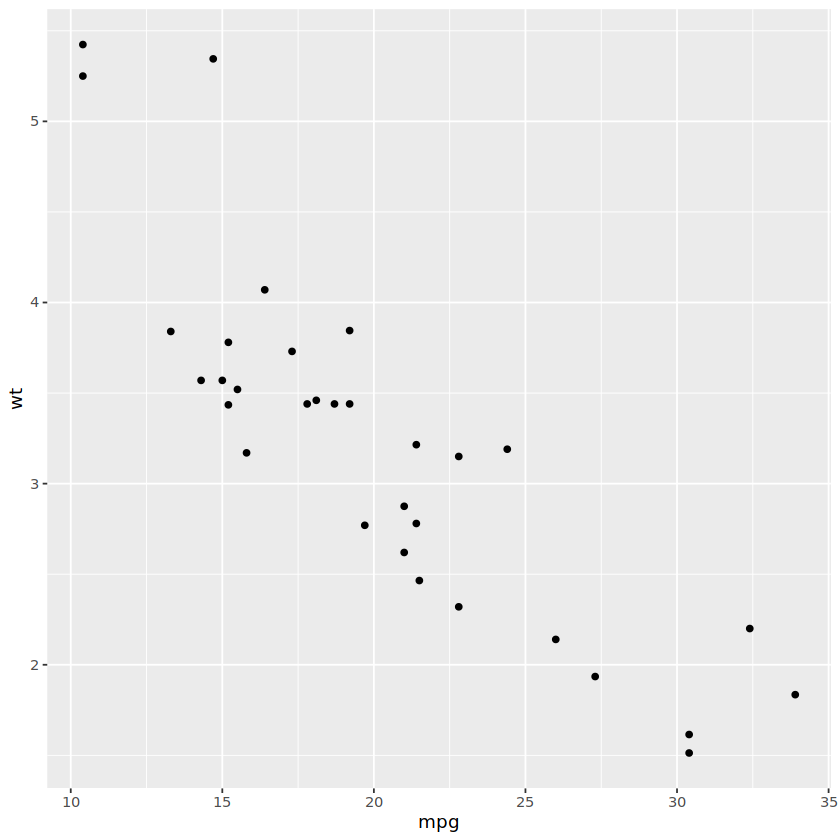

In [3]:
qplot(mpg, wt, data = mtcars)

We can create a similar graph using `ggplot` and `geom_point`, which is the more conventional way to create plots with ggplot.


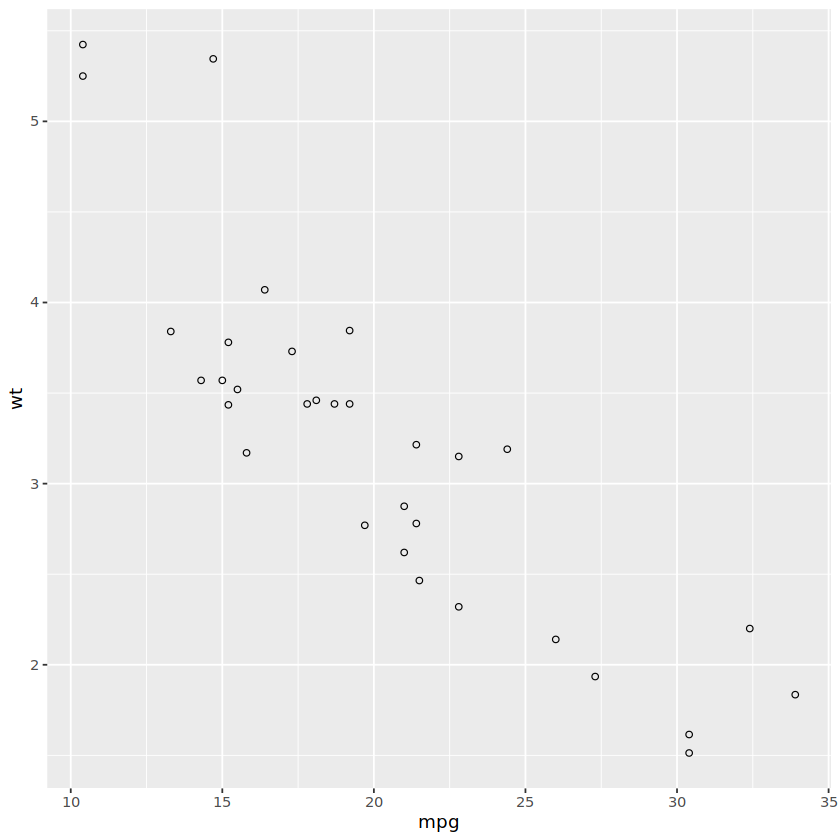

In [4]:
ggplot(mtcars, aes(x = mpg, y = wt)) + geom_point(shape = 1)

You probably noticed that the shape of the circles changed. This is because of the `shape = 1` parameter in `geom_point`. By default, `shape = 16`.


Since we can control the shapes of the points, we can take advantage of this to plot three variables in the 2D scatter plot. You just need to add the `shape` parameter in the `aes`. So now we are visualizing `mpg`, `wt`, and `cyl`.

Notice that when you put `shape` into the `aes`, it is used to *map that aesthetic to a variable*. In comparison, having `shape` in the `geom_point` changes *all* points.

So now, let's set number of cylinders to the shape, i.e. `shape = cyl`. However, if you were to try to run:
```
ggplot(mtcars, aes(x = mpg, y = wt, shape = cyl)) + 
  geom_point()
```
you will get an error because the variable set to `shape` must be *categorical*. We may interpret `cyl` (number of cylinders) to be categorical because it is discrete and there are three categories (4, 6, 8). However to R right now, it is numerical. You must explicitly tell R it is categorical by using `factor()`. In the previous lab, you saw that you can use `mutate` from tidyverse to do this. Another way is the following:


In [5]:
mtcars$cyl_factor <- factor(mtcars$cyl)

This created a new column, `cyl_factor` in the dataframe `mtcars`. Now we can plot using this new column.


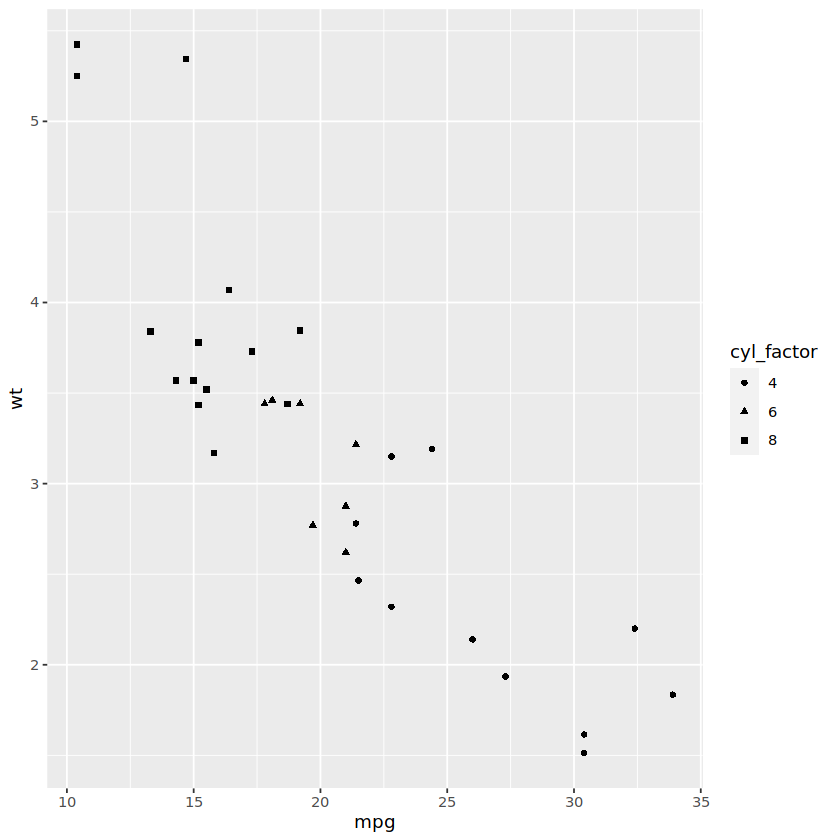

In [6]:
ggplot(mtcars, aes(x = mpg, y = wt, shape = cyl_factor)) + geom_point()

Another aesthetic we change is the colors of all the points using the `color` (or `colour`) parameter.


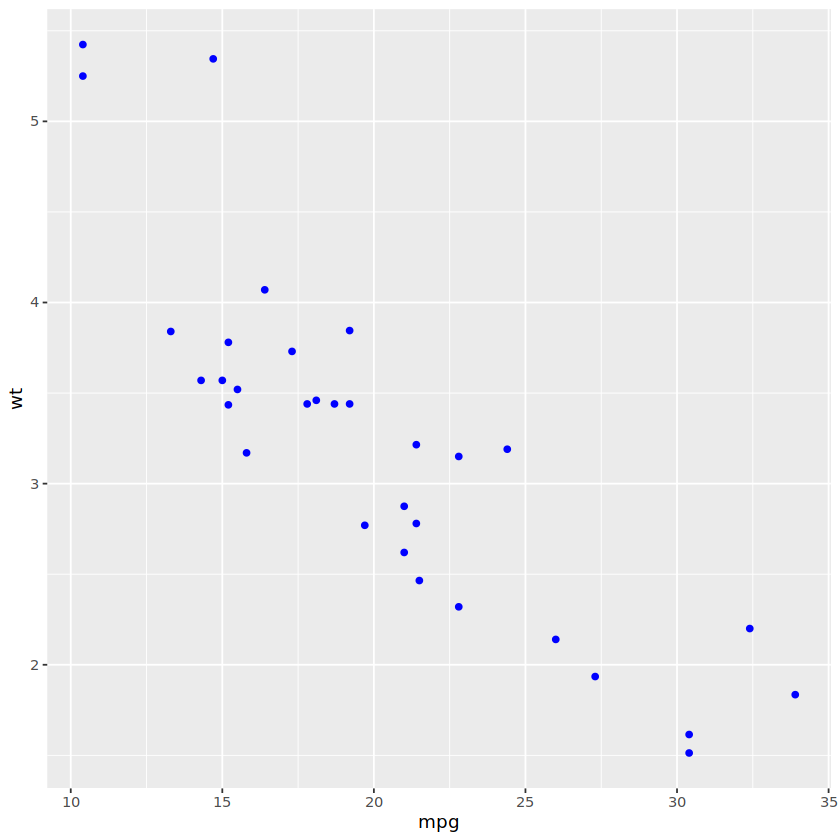

In [7]:
ggplot(mtcars, aes(x = mpg, y = wt)) + geom_point(color = "blue")

As we did with the shapes, we can do the same with colors to add a third variable, number of cylinders. Again, you just pass the `color` parameter into `aes`.


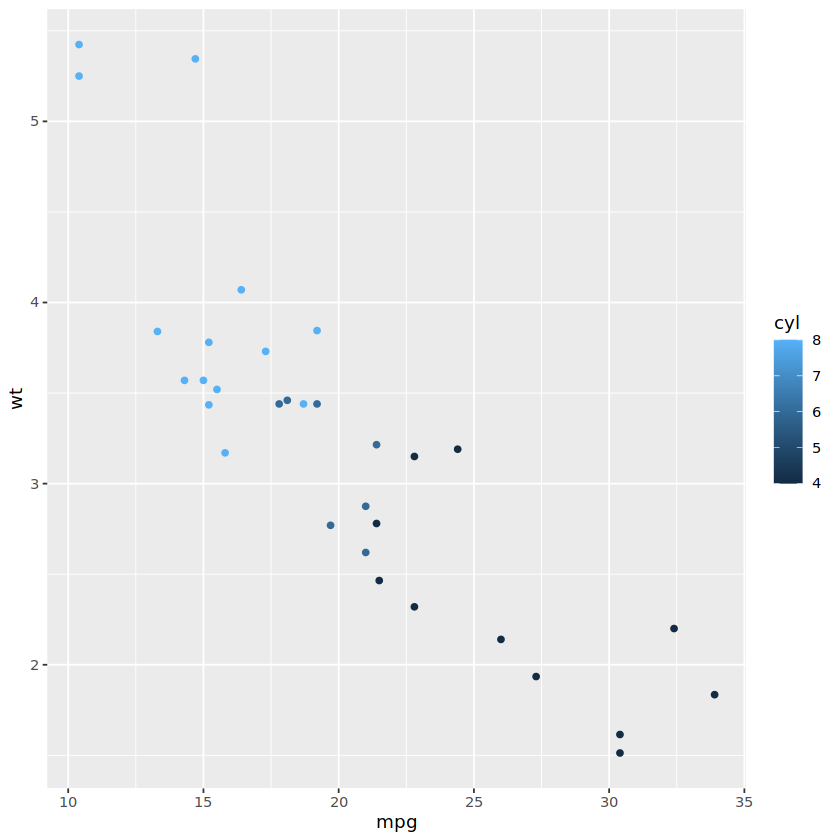

In [8]:
ggplot(mtcars, aes(x = mpg, y = wt, color = cyl)) + geom_point()

Above, you can see that there is a gradient of blue colors (valued from 4 to 8) because we used `cyl` which is numerical. Like the graph that used shapes, we should use `cyl_factor` since we interpret it to be categorical. A unique color gets assigned for each number of cylinders.


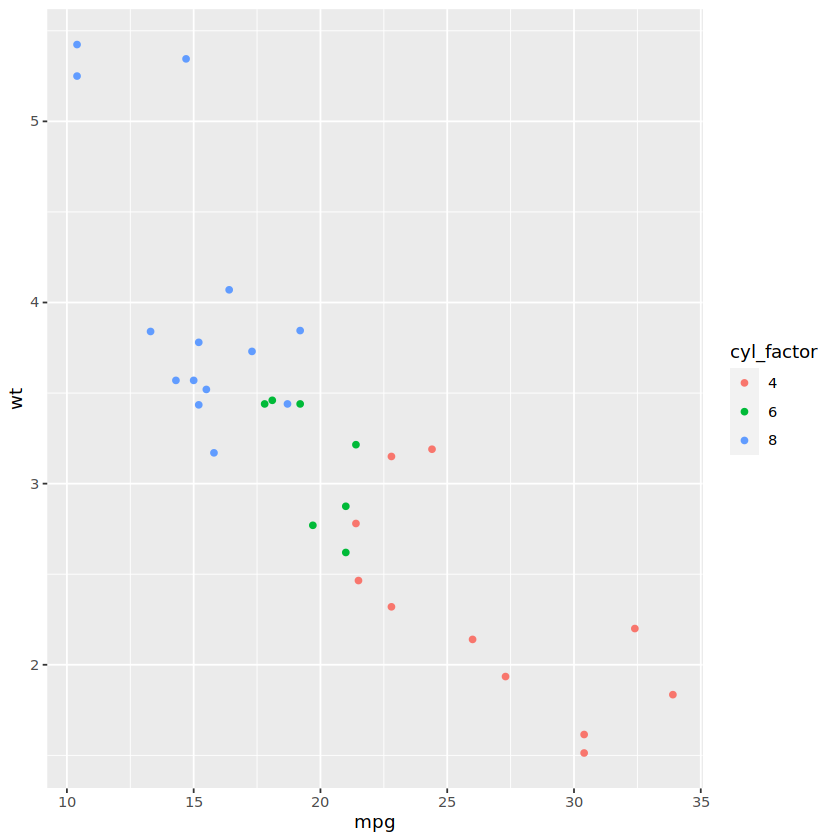

In [9]:
ggplot(mtcars, aes(x = mpg, y = wt, color = cyl_factor)) + geom_point()

In later lessons, you will go more into detail about ways to customize plots and add labels. Here, we will add some basic labels so that people who view the graph can better understand what it means. Note that in `labs`, the parameter `color` changes the legend title.


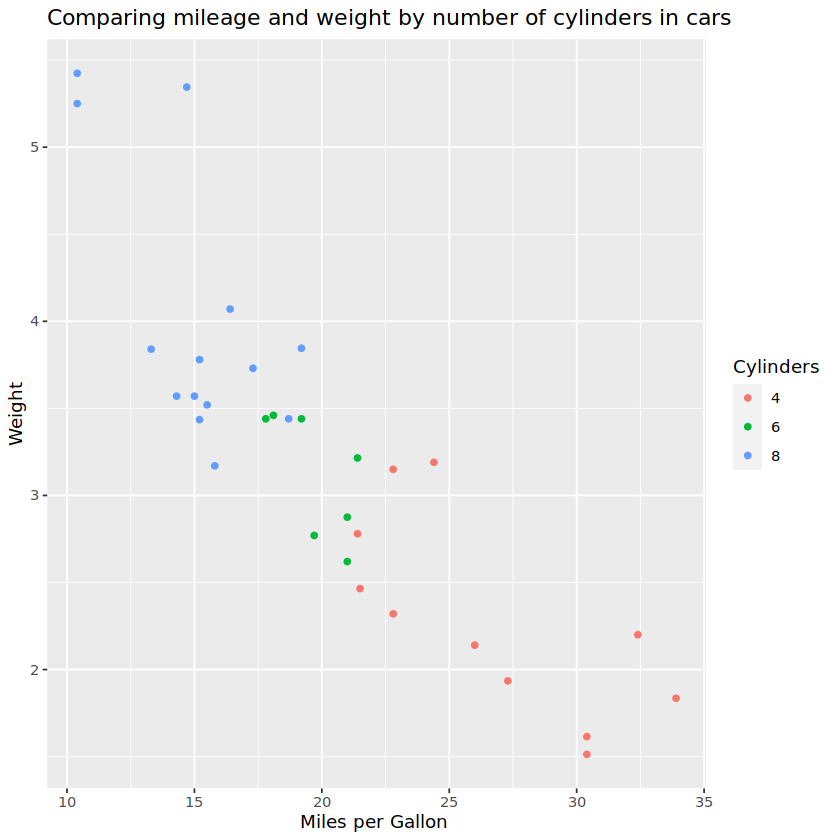

In [10]:
ggplot(mtcars,aes(x = mpg, y = wt, color = cyl_factor)) + 
  geom_point() + 
  xlab("Miles per Gallon ") + 
  ylab("Weight") +
  labs(colour = "Cylinders") + 
  ggtitle("Comparing mileage and weight by number of cylinders in cars")

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  #1:</h1>

<p>Create a scatter plot using the "mtcars" dataset. Set the x-axis as "hp" (gross horsepower) and the y-axis as "qsec" (1/4 mile time). Also, color the points by "gear" (number of forward gears). As a bonus, add more meaningful labels and a title to the plot. </p>
<p><b>Hint</b>: Use "factor()" to change a variable to categorical.     </p>

</div>


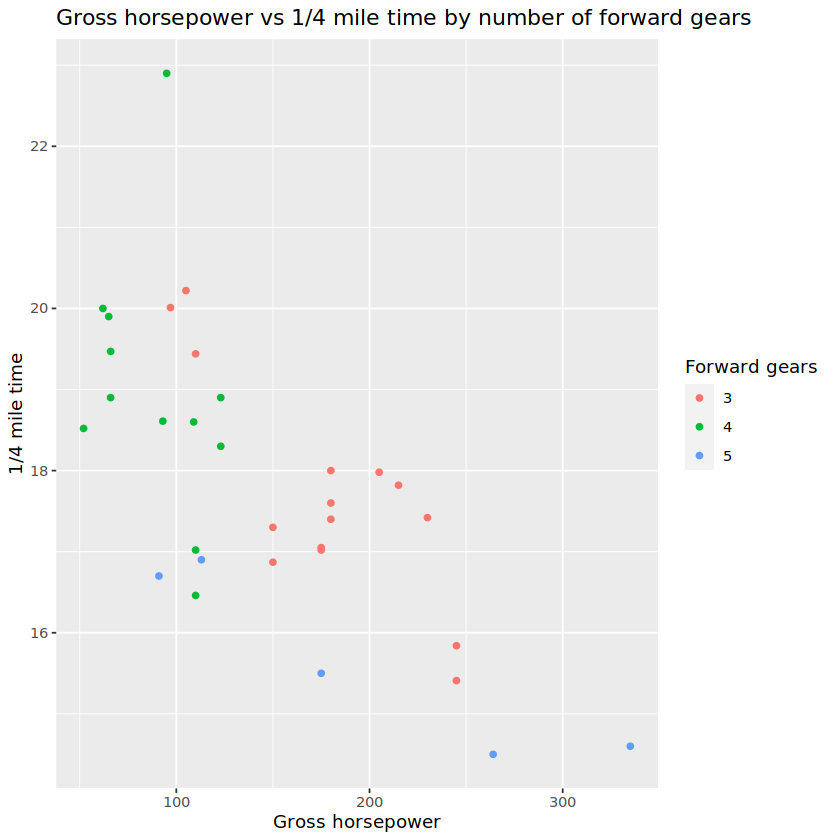

In [11]:
# Write your code below and press Shift+Enter to execute 
mtcars$gear_factor <- factor(mtcars$gear) 
ggplot(mtcars, aes(x = hp, y = qsec, color = gear_factor)) +
    geom_point() + 
    labs(x = "Gross horsepower", y = "1/4 mile time", 
         color = "Forward gears", 
         title = "Gross horsepower vs 1/4 mile time by number of forward gears") 

<details>
    <summary>Click here for the solution.</summary>

```
    
mtcars$gear_factor <- factor(mtcars$gear) 
ggplot(mtcars, aes(x = hp, y = qsec, color = gear_factor)) +
    geom_point() + 
    labs(x = "Gross horsepower", y = "1/4 mile time", 
         color = "Forward gears", 
         title = "Gross horsepower vs 1/4 mile time by number of forward gears") 
```
                 
</details>


<hr>


<a id="ref2"></a>
<h2 align=center>Line Plots</h2>


Line plots are also representations of data in which Cartesian coordinates are used. Much like scatter plots, the data is transformed into points - however, in line plots, they are connected by lines, as the name implies.


<a id="ref3"></a>
<h3>Simple Line Plots</h3>


For line graphs, we are going to use the EuStockMarkets dataset. It is also a dataset that comes included with R and it describes four European Stock markets' historical data. Namely, DAX (Germany), SMI (Switzerland), CAC (France), FTSE (UK).


Let's start looking at their helpfile.


In [12]:
?EuStockMarkets

EuStockMarkets {datasets},R Documentation


In [13]:
head(EuStockMarkets)

DAX,SMI,CAC,FTSE
1628.75,1678.1,1772.8,2443.6
1613.63,1688.5,1750.5,2460.2
1606.51,1678.6,1718.0,2448.2
1621.04,1684.1,1708.1,2470.4
1618.16,1686.6,1723.1,2484.7
1610.61,1671.6,1714.3,2466.8


As we can see, it contains 1860 observations for each, and the type is `mts`, which stands for Multivariate Time Series.
The `mts` object is an object built into R in the `stats` library.  There are also `ts` or time series objects with just one variable. You can also extract additional information from these objects, for example the `time()`:


In [14]:
head(time(EuStockMarkets))

[1] 1991.496 1991.500 1991.504 1991.508 1991.512 1991.515

`ggplot2` doesn't work with time series objects. So it must be converted to a dataframe. 
Now, we will:
1. Convert the time series object into a dataframe with `as.data.frame()`, and
2. Add the date column with `time()`


In [15]:
EuStockDF <- as.data.frame(EuStockMarkets)
EuStockDF$Date <- as.numeric(time(EuStockMarkets))

Now, let's check to see how the data is structured.


In [16]:
head(EuStockDF)

,DAX,SMI,CAC,FTSE,Date
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1628.75,1678.1,1772.8,2443.6,1991.496
2,1613.63,1688.5,1750.5,2460.2,1991.500
3,1606.51,1678.6,1718.0,2448.2,1991.504
4,1621.04,1684.1,1708.1,2470.4,1991.508
5,1618.16,1686.6,1723.1,2484.7,1991.512
6,1610.61,1671.6,1714.3,2466.8,1991.515


Now, let's start plotting!


With ggplot, you can use `geom_line` to add lines. Let's create a line graph of the "DAX" stock price.


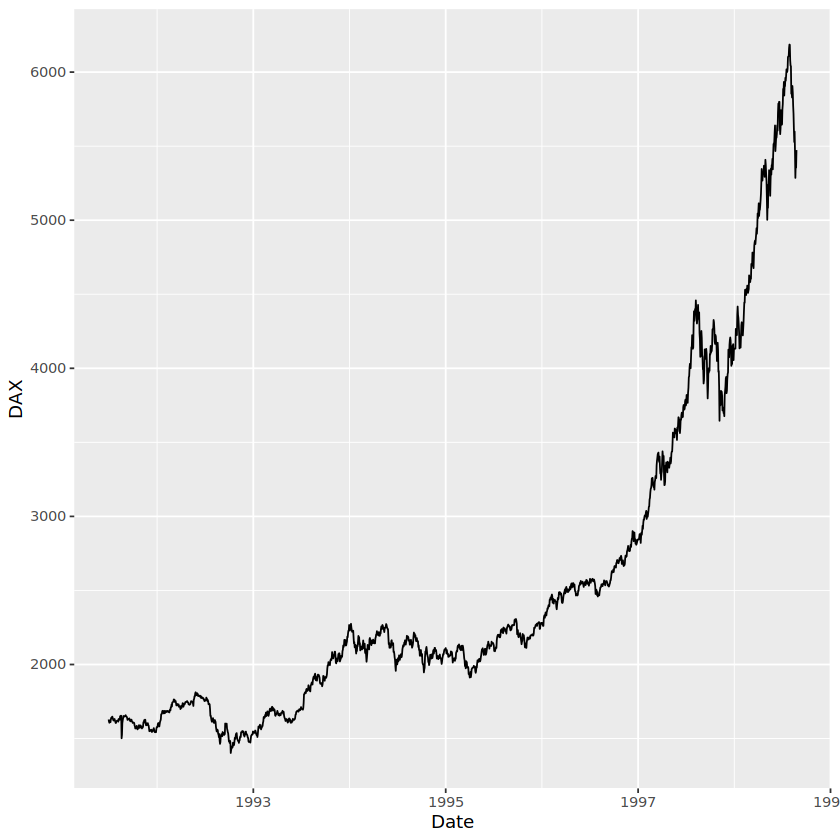

In [17]:
ggplot(EuStockDF, aes(x = Date, y = DAX)) + geom_line()

Let's increase the width of our line with the `size` parameter. You can also change the color with the `color` parameter.
We will put these parameters in the `geom_line` function.


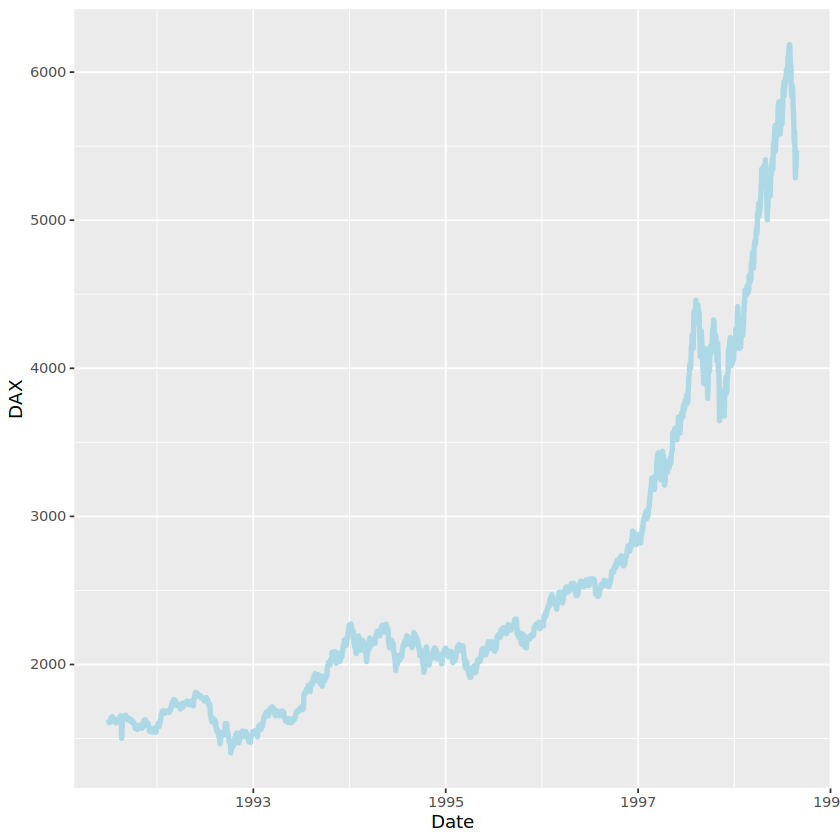

In [18]:
ggplot(EuStockDF, aes(x = Date, y = DAX)) + 
  geom_line(size = 1.5, color = "light blue")

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  #2:</h1>

<p>Create a line plot using the "EuStockDF" dataset. Set the x-axis as "Date" and choose any other stock index price besides DAX. Also, change the color of the line to red. </p>
</div>


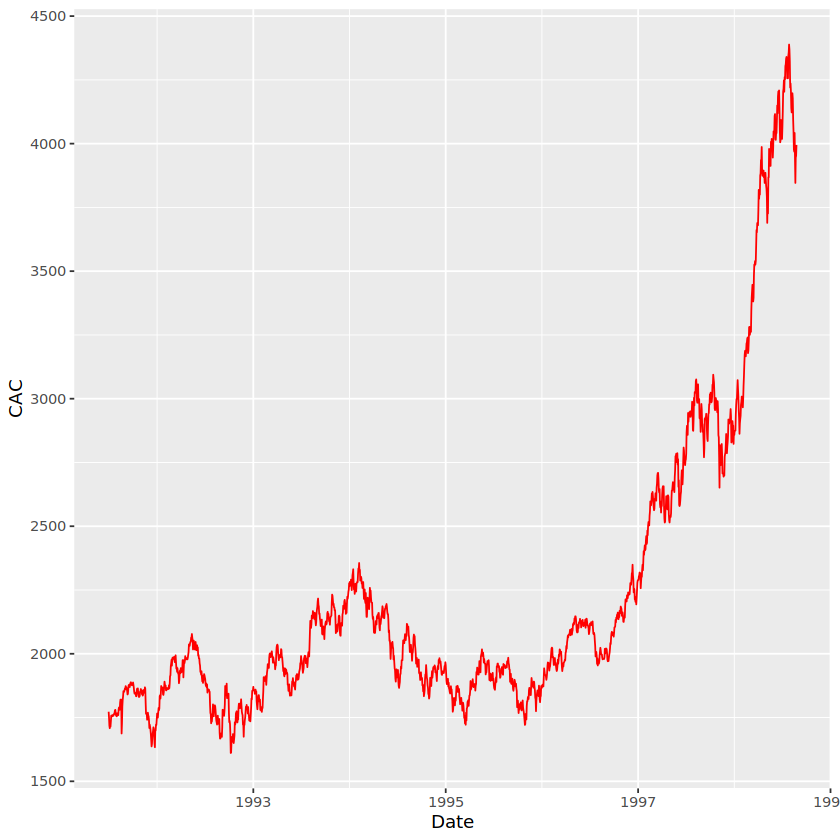

In [19]:
# Write your code below and press Shift+Enter to execute 
# Example solution using CAC
ggplot(EuStockDF, aes(x = Date, y = CAC)) +
  geom_line(color = "red")

<details>
    <summary>Click here for the solution.</summary>

```
# Example solution using CAC
ggplot(EuStockDF, aes(x = Date, y = CAC)) +
  geom_line(color = "red")
```
                 
</details>


<a id="ref4"></a>
<h3>Multiple Line Plots</h3>


One way you could create a multiple line plot is to add `geom_line()` for every line you wish to have. Using "EuStockDF", we can add a line for every stock index. We update the `y` with the stock index we are adding and you also must specify the color or else all the lines will be the same color.


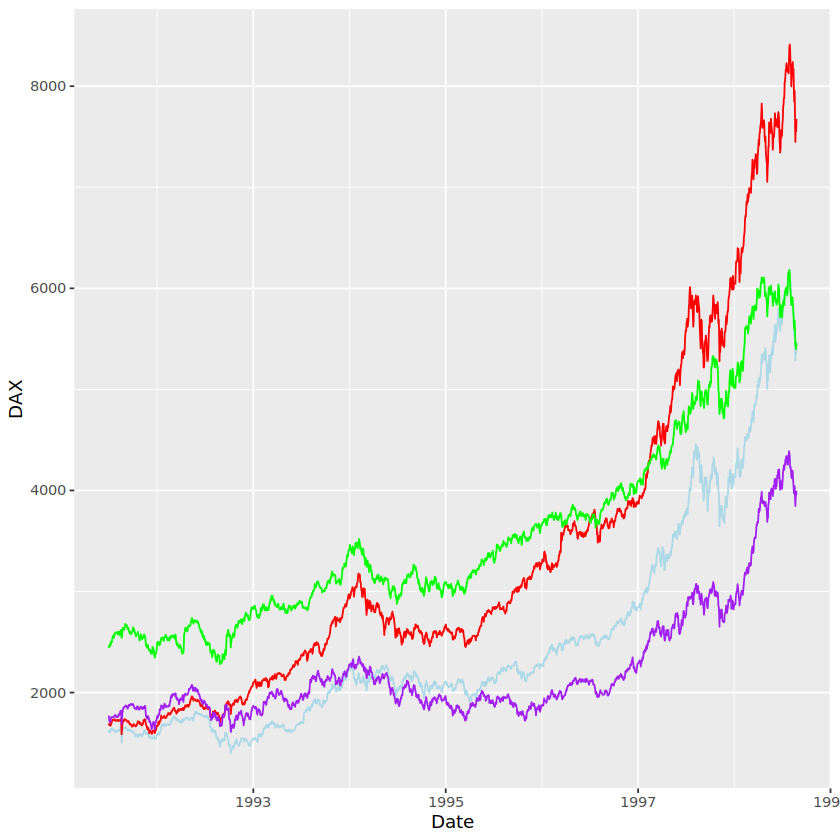

In [20]:
ggplot(EuStockDF, aes(x = Date)) +
  geom_line(aes(y = DAX), color = "light blue") +
  geom_line(aes(y = SMI), color = "red") + 
  geom_line(aes(y = CAC), color = "purple") + 
  geom_line(aes(y = FTSE), color = "green")

However, this is tedious since you have to manually specify the color of the line and there is no legend to label each line. Another downside of using this method is that the y-axis labels  you may not realize that your y-axis may be misleading and not be the same units. It may take a lot of customizations to make this plot interpretable.


The *better* option is to put the data in a "tidy" format and then plot. For example, if the below table is the original table you can see that each column is a different stock index and each value is a price. 

| stock1 | stock2 | stock3 |
|--------|--------|--------|
| 1      | 10     | 100    |
| 2      | 20     | 200    |
| 3      | 30     | 300    |


The "tidy" version would be to combine all the prices into one column and have another column to denote the stock index type.

| stock  | price  |
|--------|--------|
| stock1 | 1      |
| stock2 | 10     |
| stock3 | 100    |
| stock1 | 2      |
| stock2 | 20     |
| stock3 | 200    |
| stock1 | 3      |
| stock2 | 30     |
| stock3 | 300    |


You can use the `tidyverse` package to tidy up dataframes. The package, `broom` is included, however it is not automatically loaded when `tidyverse` is loaded. So you must explicitly load it.


In [21]:
library(tidyverse)
library(broom)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
✔ purrr   0.3.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks plotly::filter(), stats::filter()
✖ dplyr::lag()    masks stats::lag()


There is a function `broom::tidy()` that can easily convert `mts` object types into a tidy dataframe. By default, the name of the columns will become "index", "series", and "value". So you can rename them with the `rename` function. Remember that the time is hidden in `mts` objects, so that is why the date is extracted in the tidy version.


In [22]:
tidy_stocks <- tidy(EuStockMarkets) %>% 
  rename(Date = index, Stock_Index = series, Price = value) 

head(tidy_stocks)

Date,Stock_Index,Price
<dbl>,<chr>,<dbl>
1991.496,DAX,1628.75
1991.500,DAX,1613.63
1991.504,DAX,1606.51
1991.508,DAX,1621.04
1991.512,DAX,1618.16
1991.515,DAX,1610.61


Now, the data is in the correct format. We can plot this by using `geom_line()` just once. Now, in the `aes()`, set `color = Stock_Index`. The different stock index types (DAX, CAC, FTSE, SMI) will automatically be detected. Each line will have its own color and a legend is created.


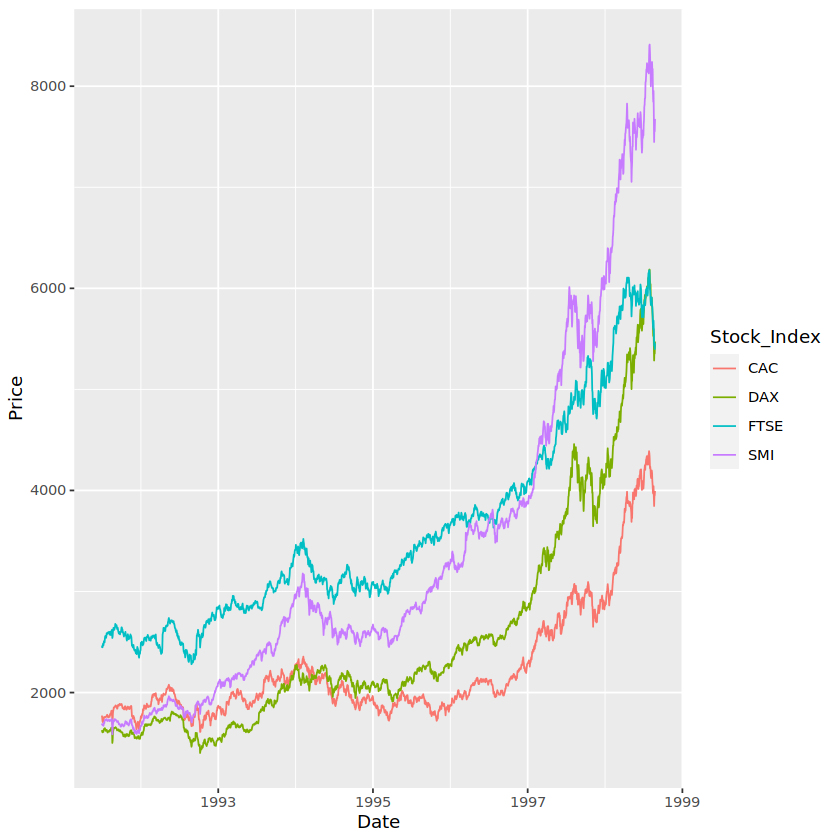

In [23]:
ggplot(tidy_stocks, aes(x = Date, y = Price, color = Stock_Index)) +
  geom_line()

As you can see, with "tidy" data, a beautiful and informative graph can easily be created with ggplot2.


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  #3:</h1>

<p>Create a line plot using the "Orange" dataset, which is built in dataset about the growth of orange trees. Set the x-axis as "age" and set the y-axis as "circumference". Create a line for every "Tree". </p>
<p><b>Hint</b>: This dataset is already in a "tidy" format.</p>

</div>


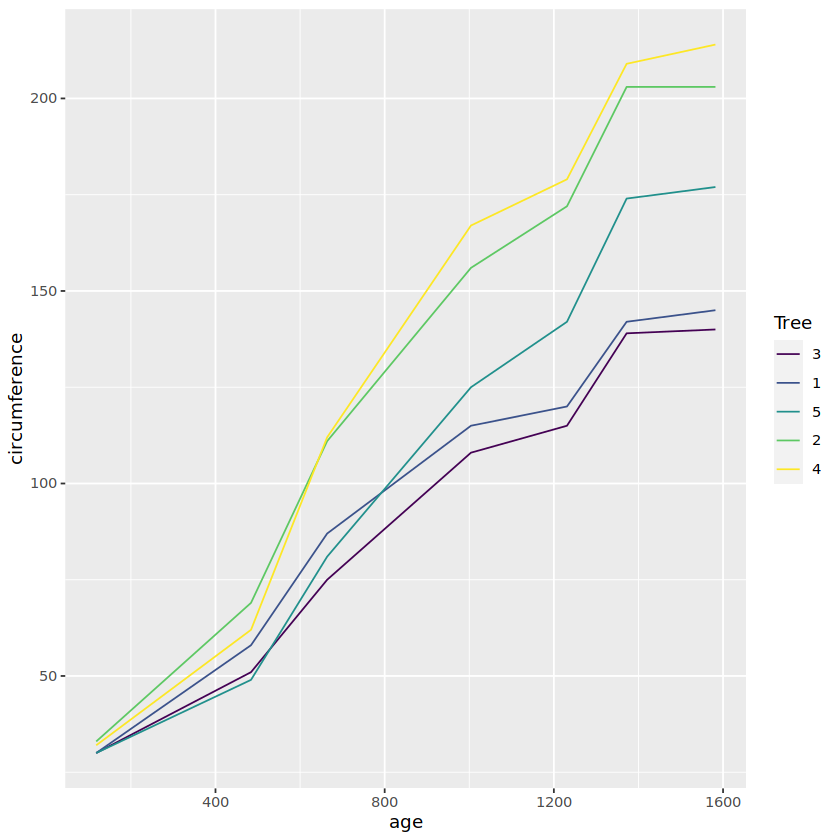

In [24]:
# Write your code below and press Shift+Enter to execute 
ggplot(Orange, aes(x = age, y = circumference, color = Tree)) +
  geom_line()

<details>
    <summary>Click here for the solution.</summary>

```
ggplot(Orange, aes(x = age, y = circumference, color = Tree)) +
  geom_line()
```
                 
</details>


<hr>
<a id="ref5"></a>
<h2 align=center>Box Plots</h2>


Box plots are good to indicate dispertion. They do so by providing visual representations in terms of [quartiles](https://en.wikipedia.org/wiki/Quartile?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDV0151ENSkillsNetwork871-2022-01-01). The main parts of a box plot are:

* The **median** (second quartile or Q2) of the data, which represents the middle datapoint. In the plot, it is the thickest line in the middle of the rectangle.
* The **Upper Quartile** (third quartile or Q3), which is the 75th percentile. In the plot, it is the top of the rectangle (or rightmost of the rectangle if it is oriented horizontally). 
* The **Lower Quartile** (first quantile or Q1), which is the 25th percentile. In the plot, it is the bottom of the rectangle (or leftmost of the rectangle if it is oriented horizontally). 
* The **Interquartile Range** (IQR), which is the difference between the  first and third quartiles.
* **Outliers** are defined as values less than Q1 - 1.5 * IQR or greater than Q3 + 1.5 * IQR. In the plot, these are the dots.

A nice library to use with boxplots is "plotly" because it makes the plot interactive and you can see all of these parts. So first, "plotly" should be installed.


In [1]:
install.packages("plotly")
library(plotly)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: ggplot2
Warning message:
“replacing previous import ‘lifecycle::last_warnings’ by ‘rlang::last_warnings’ when loading ‘tibble’”Warning message:
“replacing previous import ‘ellipsis::check_dots_unnamed’ by ‘rlang::check_dots_unnamed’ when loading ‘tibble’”Warning message:
“replacing previous import ‘ellipsis::check_dots_used’ by ‘rlang::check_dots_used’ when loading ‘tibble’”Warning message:
“replacing previous import ‘ellipsis::check_dots_empty’ by ‘rlang::check_dots_empty’ when loading ‘tibble’”
Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout



With ggplot, adding `geom_boxplot` creates the boxplot. If you want to visualize just one numerical variable, you can set it to `y` in `aes`. In this example, we look at `mpg` in the "mtcars" dataset. Then, you can pass in the ggplot object to [`ggplotly`](https://www.rdocumentation.org/packages/plotly/versions/4.9.3/topics/ggplotly?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDV0151ENSkillsNetwork871-2022-01-01) (from the "plotly" library) to make it interactive.


In [ ]:
p <- ggplot(mtcars, aes(y = mpg)) + geom_boxplot()
ggplotly(p)

In the interactive boxplot above, you'll notice that hovering above it with your mouse will display the different components of it. For example, the median is 19.20 here.


Additionally, if you wanted to break down a *numerical* variable by a *categorical* variable, you could set the x for categorical and y for numerical. 
For example, say you want to look more into the `mpg` variable and break it down by the number of cylinders. Remember, you have to use the *categorical* version of number of cylinders, `cyl_factor`. You can set `x = cyl_factor` and `y = mpg`.


In [ ]:
ggplot(mtcars, aes(x = cyl_factor, y = mpg)) + geom_boxplot()

As a good exercise on your own, you can try making the plot above interactive with [`ggplotly`](https://www.rdocumentation.org/packages/plotly/versions/4.9.3/topics/ggplotly?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDV0151ENSkillsNetwork871-2022-01-01).


Since throughout this lab we needed the categorical version of `cyl` several times, it was better to just create the `cyl_factor` column and call `factor()` once. 
```r
ggplot(mtcars, aes(x = cyl_factor, y = mpg)) + geom_boxplot()
```

However, it is possible to just use `factor()` inside ggplot instead of creating that extra variable like so:

```r
ggplot(mtcars, aes(x = factor(cyl), y = mpg)) + geom_boxplot()
```

Using `ggplot() + geom_boxplot()` is more common in practice. However if you did want to use `qplot()`, you could set `geom = "boxplot"`:

```r
qplot(cyl_factor, mpg, data = mtcars, geom = "boxplot")
```


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  #4:</h1>

<p>Create a box plot using the "mtcars" dataset. Set the x-axis as "hp" (gross horsepower) and break down the plot by the categorical variable "gear" (number of forward gears). Do not use  qplot().</p>
<p><b>Hint</b>: Use the variable "gear_factor" you created earlier.</p>

</div>


In [ ]:
# Write your code below and press Shift+Enter to execute 


<details>
    <summary>Click here for the solution.</summary>

```
ggplot(mtcars, aes(x = gear_factor, y = hp)) + geom_boxplot()
```
                 
</details>


<hr>
<h2 align=center>Conclusion</h2>

In this lab, you learned how to create visualizations with the format `ggplot() + geom_function()`. We focused on three plot types:
* **Scatter plots** - Use geometry function `geom_point()`. Visualizes two continuous variables with the x and y axis. You can visualize another variable with the `shape` or `color` parameters. 
* **Line plots** - Use geometry function `geom_line()`. Visualizes continuous variables and is useful for time series data.
* **Box plots** - Use geometry function `geom_boxplot()`. Similar to histograms, it visualizes the distribution of a numerical variable. The numerical variable can be broken down by a categorical variable as well. Also, `ggplotly()`  from library "plotly" makes plots interactive.

Feel free to further explore these plots with different datasets and variables!

### Thanks for completing this lab!

<hr>


### About the Author:  
Hi! It's [Yiwen Li](https://www.linkedin.com/in/yiwen-li-47a019119/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDV0151ENSkillsNetwork871-2022-01-01) and [Tiffany Zhu](https://www.linkedin.com/in/tiffany-zhu1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDV0151ENSkillsNetwork871-2022-01-01), the authors of this notebook. We hope you found R easy to learn! There's lots more to learn about R but you're well on your way. Feel free to connect with us if you have any questions.

### Other contributors:
[Francisco Magioli](https://www.linkedin.com/in/franciscomagioli?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDV0151ENSkillsNetwork871-2022-01-01) and [Erich Natsubori Sato](https://www.linkedin.com/in/erich-natsubori-sato?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDV0151ENSkillsNetwork871-2022-01-01)


<hr>
Copyright © 2021 IBM Corporation. All rights reserved.
